# SAP Router

The following subsections show a graphical representation of the main protocol packets and how to generate them.

First we need to perform some setup to import the packet classes:

In [1]:
from pysap.SAPRouter import *
from IPython.display import display

## SAP Router Admin packets

Information Request


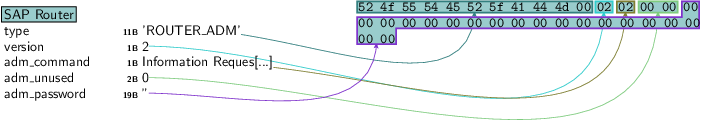

New Route Table Request


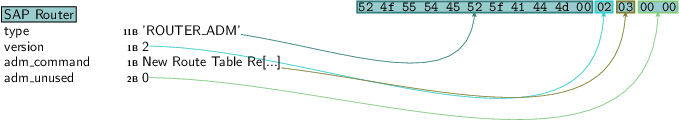

Toggle Trace Request


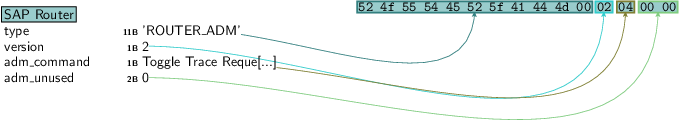

Stop Request


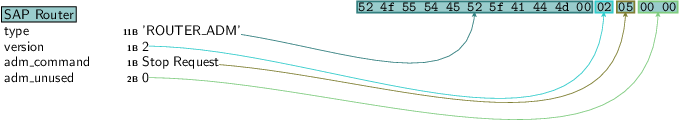

Cancel Route Request


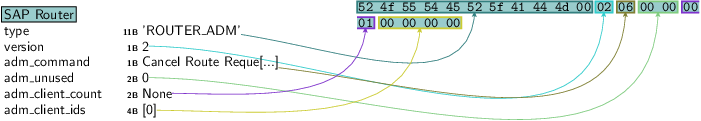

Dump Buffers Request


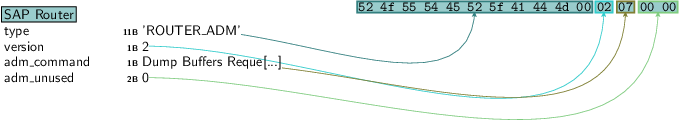

Flush Buffers Request


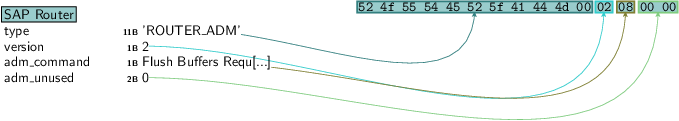

Soft Shutdown Request


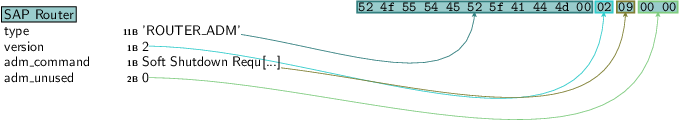

Set Trace Peer


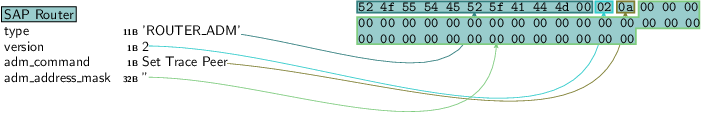

Clear Trace Peer


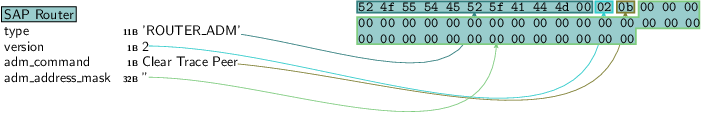

Trace Connection


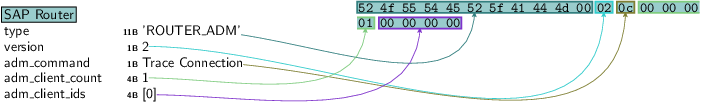

Trace Connection


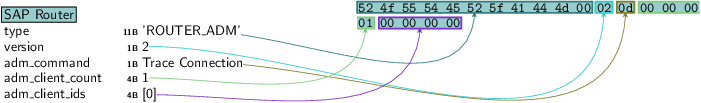

Hide Error Information Request


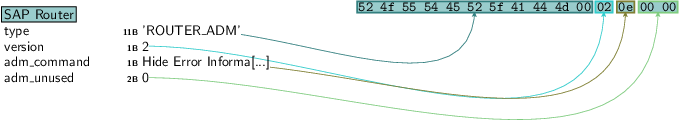

In [2]:
for command in router_adm_commands:
    p = SAPRouter(type=SAPRouter.SAPROUTER_ADMIN, adm_command=command)
    print(router_adm_commands[command])
    display(p.canvas_dump())

## SAP Router Error Information / Control packets

Error information


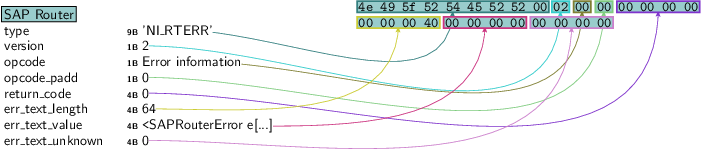

Version request


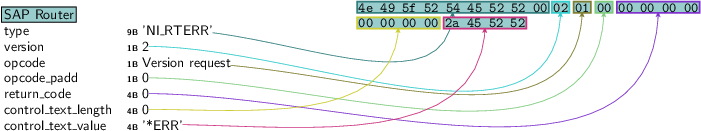

Version response


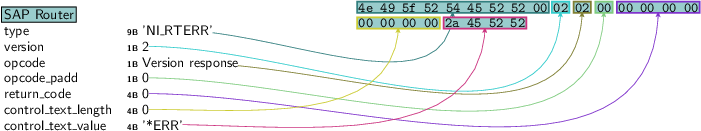

Send Handle (5)


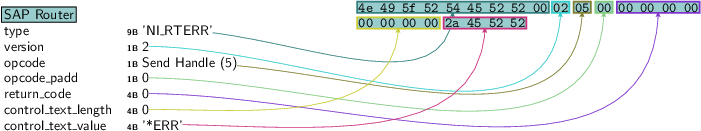

Send Handle (6)


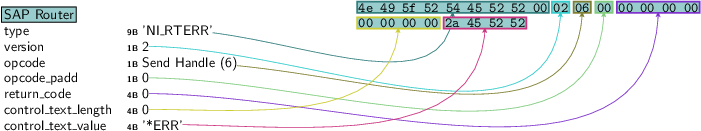

SNC handshake complete


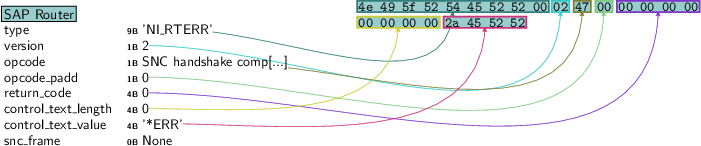

Send Handle (8)


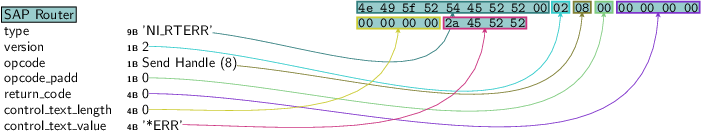

SNC request


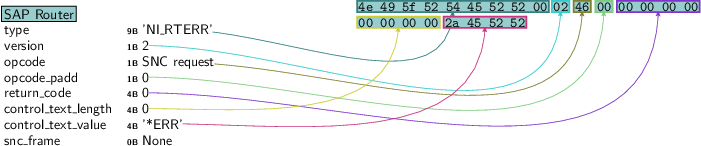

In [3]:
for opcode in router_control_opcodes:
    p = SAPRouter(type=SAPRouter.SAPROUTER_CONTROL, opcode=opcode)
    if opcode in [70, 71]:
        p.snc_frame = ""
    print(router_control_opcodes[opcode])
    display(p.canvas_dump())

## SAP Router Route packet

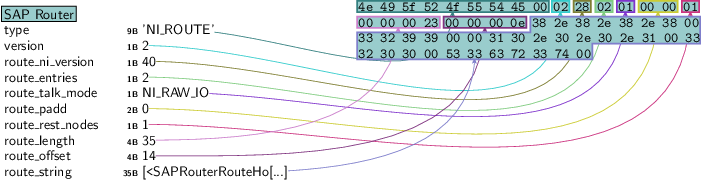

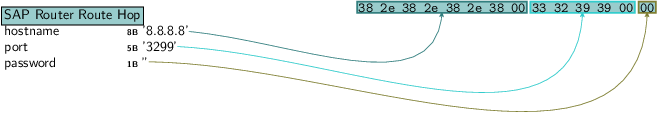

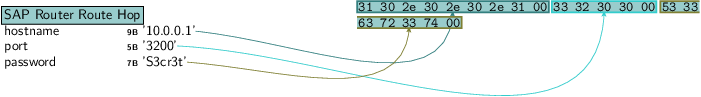

In [4]:
router_string = [SAPRouterRouteHop(hostname="8.8.8.8", port=3299),
                 SAPRouterRouteHop(hostname="10.0.0.1", port=3200, password="S3cr3t")]
router_string_lens = map(len, map(str, router_string))
p = SAPRouter(type=SAPRouter.SAPROUTER_ROUTE,
              route_entries=len(router_string),
              route_talk_mode=1,
              route_rest_nodes=1,
              route_length=sum(router_string_lens),
              route_offset=router_string_lens[0],
              route_string=router_string)
display(p.canvas_dump())
for x in router_string:
    display(x.canvas_dump())

## SAP Router Pong packet

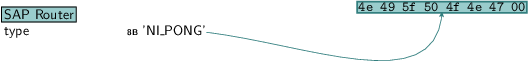

In [5]:
p = SAPRouter(type=SAPRouter.SAPROUTER_PONG)
p.canvas_dump()